In [ ]:
import pandas as pd


In [ ]:
df_dr = pd.read_csv('/Volumes/NJ_4TB/Final/7_Drought_panel_combined.csv')

In [ ]:
df_dr[df_dr['country']=='IN']

In [ ]:
df_emdat =pd.read_csv('/Volumes/NJ_4TB/EMDAT/EMDAT.csv', skiprows=6)

In [ ]:
df_emdat[(df_emdat['Disaster Type']=='Drought') & (df_emdat['Country']=='India') & (df_emdat['Start Year']==2000)]['Total Affected']

In [ ]:
df_new.columns

In [ ]:
df_geom = pd.read_csv('/Volumes/NJ_4TB/Final/Geomet_instruments.csv')
df_new = df_geom.merge(df_dr, on=['country','year'],how='inner')

In [ ]:

df_new.to_csv('sanity_check.csv')

In [ ]:
df_dr[df_dr['country']=='CY']

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(df_new['drought'], df_new['total_damages_adj'])

In [ ]:
# FE model
import statsmodels.api as sm
from linearmodels import PanelOLS
exog = sm.tools.tools.add_constant(df_new['total_damages_adj'])
endog = df_new['r10_drought']
# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(fe_res)

In [1]:
import pandas as pd
df = pd.read_csv('/Users/nitashajhala/Desktop/Disaster_adapt panels/ExTemp Stata/1_ExTemp_panel_combined_instruments_updated.csv')
df.head()

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,r10_drought,r10_flood,r10_disindex,r10_disindexla,r10_indexla,r10_dindex,r10_region,r10_income_group,population_density,polity
0,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.509876,0.5
1,0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.611738,0.5
2,0,0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.953971,0.5
3,0,0,0,1,0,0,0,0,0,0,...,0.0,6.431679,139.570863,0.039060,0.080408,1097.364630,NaN,NaN,223.826709,0.5
4,0,0,0,0,1,0,0,0,0,0,...,0.0,6.469311,145.106024,0.040609,0.083307,1136.929933,NaN,NaN,225.564354,NaN


In [13]:
import numpy as np
df['log_deaths'] = np.log(df['total_deaths']+1)
df['log_deaths']
df.head()

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,r10_flood,r10_disindex,r10_disindexla,r10_indexla,r10_dindex,r10_region,r10_income_group,population_density,polity,log_deaths
0,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.509876,0.5,0.0
1,0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.611738,0.5,0.0
2,0,0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.953971,0.5,0.0
3,0,0,0,1,0,0,0,0,0,0,...,6.431679,139.570863,0.039060,0.080408,1097.364630,NaN,NaN,223.826709,0.5,0.0
4,0,0,0,0,1,0,0,0,0,0,...,6.469311,145.106024,0.040609,0.083307,1136.929933,NaN,NaN,225.564354,NaN,0.0


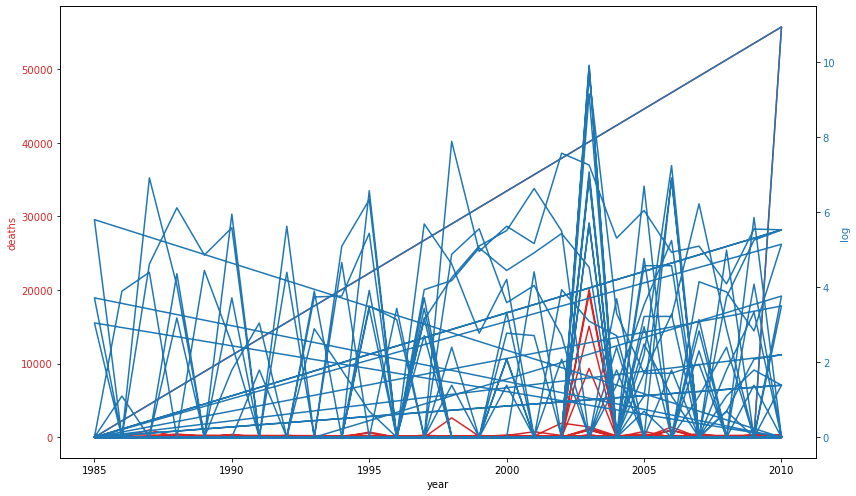

In [16]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('deaths', color=color)
ax1.plot(df['year'], df['total_deaths'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('log', color=color)  # we already handled the x-label with ax1
ax2.plot(df['year'], df['log_deaths'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()